In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Waiting for a Spark session to start...
Spark Initialization Done! ApplicationId = app-20200712032934-0000
KERNEL_ID = 6b397141-3df9-4af7-a20a-7b334abde52f


In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_e713e4258c5b42f3a00b89fcaa820e9b = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='7MQvdbzKXZRO5GYyWITSdxd0vvKJFjQg9VvK2Dxmo4xS',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_e713e4258c5b42f3a00b89fcaa820e9b.get_object(Bucket='windoutput-donotdelete-pr-dxhrchiibgtonl',Key='windoutput.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_excel(body)
data.head()


,TimeStamp,TotalPower[kW],TotalWindSpeed[m/s],TotalTemperature[°C],TotalWindDirection[°]
0,2016-01-01 00:00:00,1372.666667,5.936364,-4.060606,32.151515
1,2016-01-01 01:00:00,664.116667,4.743939,-4.045455,26.448485
2,2016-01-01 02:00:00,13.583333,2.871212,-3.757576,67.734848
3,2016-01-01 03:00:00,176.716667,3.675758,-3.939394,60.374242
4,2016-01-01 04:00:00,64.116667,3.280303,-3.863636,69.712121


In [3]:
data.isna().sum() > 8

TimeStamp                False
TotalPower[kW]           False
TotalWindSpeed[m/s]      False
TotalTemperature[°C]     False
TotalWindDirection[°]    False
dtype: bool

In [4]:
cols_to_drop = ['TotalWindSpeed[m/s]', 'TotalTemperature[°C]', 'TotalWindDirection[°]']
data = data.drop(cols_to_drop, axis=1)

In [5]:
data.head

<bound method NDFrame.head of                 TimeStamp  TotalPower[kW]
0     2016-01-01 00:00:00     1372.666667
1     2016-01-01 01:00:00      664.116667
2     2016-01-01 02:00:00       13.583333
3     2016-01-01 03:00:00      176.716667
4     2016-01-01 04:00:00       64.116667
5     2016-01-01 05:00:00        0.050000
6     2016-01-01 06:00:00        0.033333
7     2016-01-01 07:00:00        0.166667
8     2016-01-01 08:00:00        0.083333
9     2016-01-01 09:00:00        0.016667
10    2016-01-01 10:00:00        0.183333
11    2016-01-01 11:00:00       57.500000
12    2016-01-01 12:00:00        2.233333
13    2016-01-01 13:00:00        0.000000
14    2016-01-01 14:00:00        0.083333
15    2016-01-01 15:00:00        0.016667
16    2016-01-01 16:00:00      294.016667
17    2016-01-01 17:00:00      565.950000
18    2016-01-01 18:00:00     1091.416667
19    2016-01-01 19:00:00     2295.800000
20    2016-01-01 20:00:00     3319.900000
21    2016-01-01 21:00:00     2287.550000
22  

In [6]:
data.index = pd.to_datetime(data['TimeStamp'])

In [7]:
data = data.resample('D').mean()

In [8]:
data.head()

,TotalPower[kW]
TimeStamp,
2016-01-01,752.951389
2016-01-02,791.271528
2016-01-03,5636.693750
2016-01-04,3256.499306
2016-01-05,2310.003472


In [33]:
pip install fbprophet


The following command must be run outside of the IPython shell:

    $ pip install fbprophet

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [10]:
 !conda install -c conda-forge --override-channels fbprophet

Solving environment: done

## Package Plan ##

  environment location: /home/spark/shared/conda/envs/python3.6

  added / updated specs:
    - fbprophet


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |           1_llvm           5 KB  conda-forge
    arviz-0.9.0                |             py_0         1.3 MB  conda-forge
    binutils_impl_linux-64-2.34|       h53a641e_6         9.2 MB  conda-forge
    binutils_linux-64-2.34     |      hc952b39_20          21 KB  conda-forge
    bzip2-1.0.8                |       h516909a_2         396 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    cftime-1.2.0               |   py36h785e9b2_1         274 KB  conda-forge

ephem-3.7.7.1        | 722 KB    | ##################################### | 100% 
convertdate-2.2.1    | 33 KB     | ##################################### | 100% 
_openmp_mutex-4.5    | 5 KB      | ##################################### | 100% 
freetype-2.10.2      | 905 KB    | ##################################### | 100% 
curl-7.71.1          | 140 KB    | ##################################### | 100% 
libcblas-3.8.0       | 11 KB     | ##################################### | 100% 
pyparsing-2.4.7      | 60 KB     | ##################################### | 100% 
arviz-0.9.0          | 1.3 MB    | ##################################### | 100% 
lunarcalendar-0.0.9  | 20 KB     | ##################################### | 100% 
libnetcdf-4.7.4      | 1.3 MB    | ##################################### | 100% 
binutils_impl_linux- | 9.2 MB    | ##################################### | 100% 
certifi-2020.6.20    | 151 KB    | ##################################### | 100% 
libblas-3.8.0        | 11 KB

In [11]:
from fbprophet import Prophet
import logging

ERROR:fbprophet.plot:Importing plotly failed. Interactive plots will not work.


In [12]:
logging.getLogger().setLevel(logging.ERROR)

In [13]:
data.head()

,TotalPower[kW]
TimeStamp,
2016-01-01,752.951389
2016-01-02,791.271528
2016-01-03,5636.693750
2016-01-04,3256.499306
2016-01-05,2310.003472


In [14]:
df = data.reset_index()
df.columns = ['ds', 'y']
df.head()

,ds,y
0,2016-01-01,752.951389
1,2016-01-02,791.271528
2,2016-01-03,5636.693750
3,2016-01-04,3256.499306
4,2016-01-05,2310.003472


In [15]:
prediction_size = int(len(df) * 0.90)
train_df = df[:-prediction_size]

In [16]:
model_prophet = Prophet()
model_prophet.fit(train_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
future = model_prophet.make_future_dataframe(periods=prediction_size)
forecast = model_prophet.predict(future)


In [18]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,2102.033583,-961.718583,4695.147368,2102.033583,2102.033583,-150.700462,-150.700462,-150.700462,-150.700462,-150.700462,-150.700462,0.0,0.0,0.0,1951.333120
1,2016-01-02,2107.405966,-1024.061617,4813.557258,2107.405966,2107.405966,-320.388855,-320.388855,-320.388855,-320.388855,-320.388855,-320.388855,0.0,0.0,0.0,1787.017110
2,2016-01-03,2112.778349,-877.839700,4853.189468,2112.778349,2112.778349,-108.548611,-108.548611,-108.548611,-108.548611,-108.548611,-108.548611,0.0,0.0,0.0,2004.229737
3,2016-01-04,2118.150732,134.239418,6102.059863,2118.150732,2118.150732,814.348532,814.348532,814.348532,814.348532,814.348532,814.348532,0.0,0.0,0.0,2932.499264
4,2016-01-05,2123.523115,-1170.798896,4923.298814,2123.523115,2123.523115,-180.617234,-180.617234,-180.617234,-180.617234,-180.617234,-180.617234,0.0,0.0,0.0,1942.905880


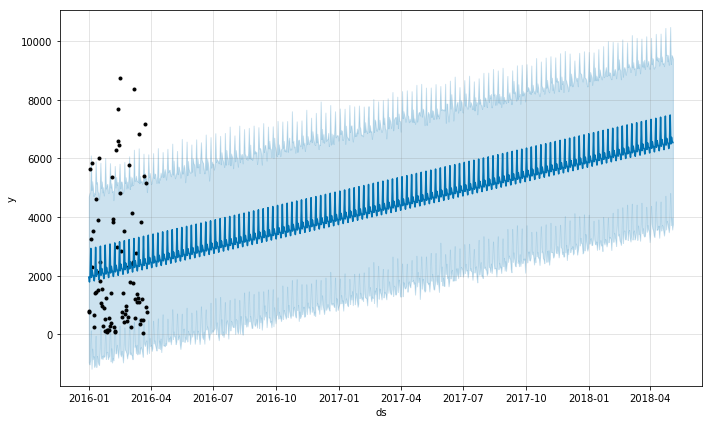

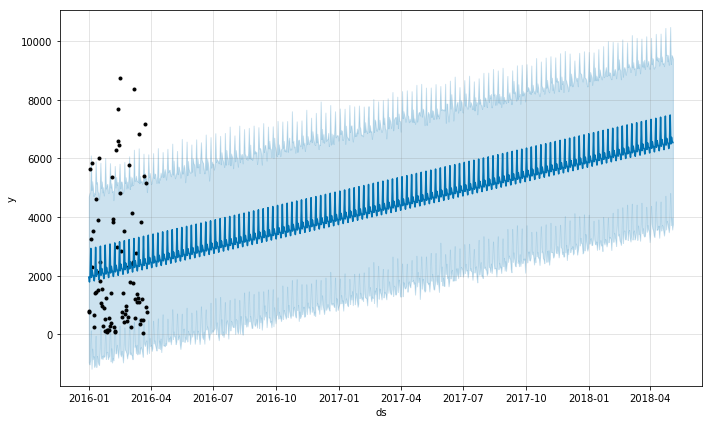

In [19]:
model_prophet.plot(forecast)

In [20]:
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))


In [21]:
cmp_df = make_comparison_dataframe(df, forecast)
cmp_df.head()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2016-01-01,1951.333120,-961.718583,4695.147368,752.951389
2016-01-02,1787.017110,-1024.061617,4813.557258,791.271528
2016-01-03,2004.229737,-877.839700,4853.189468,5636.693750
2016-01-04,2932.499264,134.239418,6102.059863,3256.499306
2016-01-05,1942.905880,-1170.798896,4923.298814,2310.003472


In [57]:
import os 
import sys

In [113]:
SPARK_HOME= '/opt/ibm/spark-x86_64-80'
JAVA_HOME = '/opt/ibm/java-x86_64-80'
PYTHONPATH= '/opt/ibm/spark-x86_64-80/python/'

In [110]:
env_var = os.environ 
  
# Print the list of user's 
# environment variables 
print("User's Environment variable:", env_var) 
#print(dict(env_var), width = 1) 

User's Environment variable: environ({'HOSTNAME': 'notebook-conda2py363403a113c5a1486e9600d7a12685174e-6b4cd4vqbtv', 'TMPDIR': '/home/dsxuser/.tmp', 'CONDA_SHLVL': '2', 'CONDA_PROMPT_MODIFIER': '(Python36) ', 'RUNTIME_ENV_STOREFRONT': 'bluemix/prod', 'PIP_UPGRADE_STRATEGY': 'only-if-needed', 'LC_ALL': 'en_US.UTF-8', 'LD_LIBRARY_PATH': '/opt/ibm/dsdriver/lib', 'BRUNEL_CONFIG': 'locjavascript=/data/jupyter2/static-file-content-delivery-network/nbextensions/brunel_ext', 'CONDA_EXE': '/opt/conda/bin/conda', 'KERNEL_LAUNCH_TIMEOUT': '40', 'RUNTIME_ENV_REGION': 'us-south', 'IBM_DB_HOME': '/opt/ibm/dsdriver', 'JPY_PARENT_PID': '99', 'CONDA_PREFIX_1': '/opt/conda/envs/DSX-Jupyter', 'PATH': '/opt/conda/envs/Python36/bin:/opt/conda/bin:/usr/bin:/bin:/opt/ibm/dsdriver/bin:/opt/conda/envs/Python36/lib', 'MKL_NUM_THREADS': '2', 'CONDA_PREFIX': '/opt/conda/envs/Python36', 'PWD': '/home/dsxuser/work', 'JAVA_HOME': '/opt/ibm/java-x86_64-80', 'LOG_FILE': '/var/pod/logs/kernel-Python36-20200712_021532.l

In [22]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [23]:
wml_credentials = {
  "apikey": "wD1YYvTS0zL5lokplWvgFSqVgqzfSjcv0eHBWyj_MSaK",
  "iam_apikey_description": "Auto-generated for key 788c5651-0531-48b2-ab4b-8643a35563b9",
  "iam_apikey_name": "Service credentials-1",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/967ff6f75e634ec5b6a837111b5df8d6::serviceid:ServiceId-b3e64b62-aa71-4bd6-804a-75097fd3aadd",
  "instance_id": "fb623f56-308d-4a68-ba08-531736ca7fc7",
  "url": "https://us-south.ml.cloud.ibm.com"
}

In [24]:
client = WatsonMachineLearningAPIClient( wml_credentials )

In [27]:
metadata = {
    #client.repository.ModelMetaNames.FRAMEWORK_VERSION: "0.6",
    client.repository.ModelMetaNames.FRAMEWORK_NAME: "Prophet",
    client.repository.ModelMetaNames.AUTHOR_NAME: "Kapil Gautam", 
    client.repository.ModelMetaNames.AUTHOR_EMAIL: "gautime.idk@gmail.com", 
    client.repository.ModelMetaNames.NAME: "Prophet_Output"
}

AttributeError: 'ModelMetaNames' object has no attribute 'FRAMEWORK_NAME'

In [120]:
published_model = client.repository.store_model(model_prophet, meta_props=metadata, training_data = train_df)

WMLClientError: Publishing model failed.
Reason: Invalid type for ml_artifact: Prophet